In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

INCLUDE_2024_DATA = True # Whether to include data from 2024 or not

In [2]:
# Activation data from Nord Pool mFRR NO1
mfrr_df = pd.read_csv('data/BalanceMarket_2025_NO1_EUR_None_MW.csv', delimiter=';')
if INCLUDE_2024_DATA:
    mfrr_df_2024 = pd.read_csv('data/BalanceMarket_2024_NO1_EUR_None_MW.csv', delimiter=';')
    mfrr_df = pd.concat([mfrr_df_2024, mfrr_df], ignore_index=True)
mfrr_df

,Delivery Start (CET),Delivery End (CET),NO1 Accepted Down Volume (MW),NO1 Accepted Up Volume (MW),NO1 Activated Down Volume (MW),NO1 Activated Up Volume (MW),NO1 Down Price (EUR),NO1 Imbalance Price (EUR),NO1 Up Price (EUR)
0,01.01.2024 00:00:00,01.01.2024 00:15:00,0,683,0.0,0.0,53.79,55.00,55.00
1,01.01.2024 00:15:00,01.01.2024 00:30:00,0,683,0.0,100.0,53.79,55.00,55.00
2,01.01.2024 00:30:00,01.01.2024 00:45:00,0,683,0.0,100.0,53.79,55.00,55.00
3,01.01.2024 00:45:00,01.01.2024 01:00:00,0,683,0.0,100.0,53.79,55.00,55.00
4,01.01.2024 01:00:00,01.01.2024 01:15:00,0,869,0.0,0.0,48.98,53.87,53.87
...,...,...,...,...,...,...,...,...,...
62483,12.10.2025 22:45:00,12.10.2025 23:00:00,459,521,0.0,35.0,48.09,NaN,53.56
62484,12.10.2025 23:00:00,12.10.2025 23:15:00,547,426,0.0,0.0,44.91,NaN,53.07
62485,12.10.2025 23:15:00,12.10.2025 23:30:00,558,357,0.0,0.0,48.10,NaN,53.07
62486,12.10.2025 23:30:00,12.10.2025 23:45:00,573,335,0.0,0.0,48.64,NaN,53.07


# Cross-zonal flow data

In [3]:
physical_flow_df = pd.read_csv('data/cross_border_flows_2025.csv')
# Cross-border flows for 2024
if INCLUDE_2024_DATA:
    physical_flow_df_2024 = pd.read_csv('data/cross_border_flows_2024.csv')
    physical_flow_df = pd.concat([physical_flow_df_2024, physical_flow_df], ignore_index=True)
    # Remove duplicate rows if an
physical_flow_df = physical_flow_df.rename(columns={"MTU": "Time"})
physical_flow_df['Time'] = physical_flow_df['Time'].str[:19]

physical_flow_df

,Time,BZN|NO1 -> BZN|NO1A,BZN|NO1A -> BZN|NO1,BZN|NO1 -> BZN|NO2,BZN|NO2 -> BZN|NO1,BZN|NO1 -> BZN|NO3,BZN|NO3 -> BZN|NO1,BZN|NO1 -> BZN|NO5,BZN|NO5 -> BZN|NO1,BZN|NO1 -> BZN|SE3,BZN|SE3 -> BZN|NO1
0,01/01/2024 00:00:00,n/e,n/e,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15
1,01/01/2024 01:00:00,n/e,n/e,0.0,1750.23,0.0,153.83,0.0,297.86,0.0,1775.05
2,01/01/2024 02:00:00,n/e,n/e,0.0,1945.87,0.0,64.53,0.0,322.82,0.0,1601.27
3,01/01/2024 03:00:00,n/e,n/e,0.0,1969.35,0.0,62.58,0.0,363.62,0.0,1533.96
4,01/01/2024 04:00:00,n/e,n/e,0.0,2062.62,15.17,0.0,0.0,403.94,0.0,1322.37
...,...,...,...,...,...,...,...,...,...,...,...
17539,31/12/2025 19:00:00,n/e,n/e,-,-,-,-,-,-,-,-
17540,31/12/2025 20:00:00,n/e,n/e,-,-,-,-,-,-,-,-
17541,31/12/2025 21:00:00,n/e,n/e,-,-,-,-,-,-,-,-
17542,31/12/2025 22:00:00,n/e,n/e,-,-,-,-,-,-,-,-


In [4]:
physical_flow_df['Time'] = pd.to_datetime(physical_flow_df['Time'], format='%d/%m/%Y %H:%M:%S')
physical_flow_df.set_index('Time', inplace=True)
physical_flow_df

,BZN|NO1 -> BZN|NO1A,BZN|NO1A -> BZN|NO1,BZN|NO1 -> BZN|NO2,BZN|NO2 -> BZN|NO1,BZN|NO1 -> BZN|NO3,BZN|NO3 -> BZN|NO1,BZN|NO1 -> BZN|NO5,BZN|NO5 -> BZN|NO1,BZN|NO1 -> BZN|SE3,BZN|SE3 -> BZN|NO1
Time,,,,,,,,,,
2024-01-01 00:00:00,n/e,n/e,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15
2024-01-01 01:00:00,n/e,n/e,0.0,1750.23,0.0,153.83,0.0,297.86,0.0,1775.05
2024-01-01 02:00:00,n/e,n/e,0.0,1945.87,0.0,64.53,0.0,322.82,0.0,1601.27
2024-01-01 03:00:00,n/e,n/e,0.0,1969.35,0.0,62.58,0.0,363.62,0.0,1533.96
2024-01-01 04:00:00,n/e,n/e,0.0,2062.62,15.17,0.0,0.0,403.94,0.0,1322.37
...,...,...,...,...,...,...,...,...,...,...
2025-12-31 19:00:00,n/e,n/e,-,-,-,-,-,-,-,-
2025-12-31 20:00:00,n/e,n/e,-,-,-,-,-,-,-,-
2025-12-31 21:00:00,n/e,n/e,-,-,-,-,-,-,-,-


In [5]:
# Change flow
physical_flow_df.rename(columns={"BZN|NO1 -> BZN|NO2": "NO1-NO2", "BZN|NO2 -> BZN|NO1": "NO2-NO1"}, inplace=True)
physical_flow_df.rename(columns={"BZN|NO1 -> BZN|NO3": "NO1-NO3", "BZN|NO3 -> BZN|NO1": "NO3-NO1"}, inplace=True)
physical_flow_df.rename(columns={"BZN|NO1 -> BZN|NO5": "NO1-NO5", "BZN|NO5 -> BZN|NO1": "NO5-NO1"}, inplace=True)
physical_flow_df.rename(columns={"BZN|NO1 -> BZN|SE3": "NO1-SE3", "BZN|SE3 -> BZN|NO1": "SE3-NO1"}, inplace=True)
physical_flow_df.drop(columns=['BZN|NO1 -> BZN|NO1A', 'BZN|NO1A -> BZN|NO1'], inplace=True)
physical_flow_df

,NO1-NO2,NO2-NO1,NO1-NO3,NO3-NO1,NO1-NO5,NO5-NO1,NO1-SE3,SE3-NO1
Time,,,,,,,,
2024-01-01 00:00:00,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15
2024-01-01 01:00:00,0.0,1750.23,0.0,153.83,0.0,297.86,0.0,1775.05
2024-01-01 02:00:00,0.0,1945.87,0.0,64.53,0.0,322.82,0.0,1601.27
2024-01-01 03:00:00,0.0,1969.35,0.0,62.58,0.0,363.62,0.0,1533.96
2024-01-01 04:00:00,0.0,2062.62,15.17,0.0,0.0,403.94,0.0,1322.37
...,...,...,...,...,...,...,...,...
2025-12-31 19:00:00,-,-,-,-,-,-,-,-
2025-12-31 20:00:00,-,-,-,-,-,-,-,-
2025-12-31 21:00:00,-,-,-,-,-,-,-,-


#### Resampling NO1-SE3
The data for the NO1-SE3 interconnector is provided on an hourly basis, while the other interconnectors have data at 15-minute intervals. To ensure consistency across all datasets, we will resample the NO1-SE3 data to 15-minute intervals using forward fill to populate the missing values.
Forward fill means that the last known value is carried forward to fill in the gaps until a new value is encountered. This assumes that the flow remains constant during the missing intervals, which is a reasonable assumption for short gaps in time series data.

In [6]:
# 2024 duplicates
if INCLUDE_2024_DATA:
    physical_flow_df = physical_flow_df[~physical_flow_df.index.duplicated(keep='first')]

physical_flow_df = physical_flow_df.resample('15min').ffill()
# Convert from object types to float numerics
for col in physical_flow_df.columns:
    physical_flow_df[col] = pd.to_numeric(physical_flow_df[col], errors='coerce')
df = physical_flow_df.copy()

df.dtypes

NO1-NO2    float64
NO2-NO1    float64
NO1-NO3    float64
NO3-NO1    float64
NO1-NO5    float64
NO5-NO1    float64
NO1-SE3    float64
SE3-NO1    float64
dtype: object

# mFRR activation data

In [7]:
mfrr_df

,Delivery Start (CET),Delivery End (CET),NO1 Accepted Down Volume (MW),NO1 Accepted Up Volume (MW),NO1 Activated Down Volume (MW),NO1 Activated Up Volume (MW),NO1 Down Price (EUR),NO1 Imbalance Price (EUR),NO1 Up Price (EUR)
0,01.01.2024 00:00:00,01.01.2024 00:15:00,0,683,0.0,0.0,53.79,55.00,55.00
1,01.01.2024 00:15:00,01.01.2024 00:30:00,0,683,0.0,100.0,53.79,55.00,55.00
2,01.01.2024 00:30:00,01.01.2024 00:45:00,0,683,0.0,100.0,53.79,55.00,55.00
3,01.01.2024 00:45:00,01.01.2024 01:00:00,0,683,0.0,100.0,53.79,55.00,55.00
4,01.01.2024 01:00:00,01.01.2024 01:15:00,0,869,0.0,0.0,48.98,53.87,53.87
...,...,...,...,...,...,...,...,...,...
62483,12.10.2025 22:45:00,12.10.2025 23:00:00,459,521,0.0,35.0,48.09,NaN,53.56
62484,12.10.2025 23:00:00,12.10.2025 23:15:00,547,426,0.0,0.0,44.91,NaN,53.07
62485,12.10.2025 23:15:00,12.10.2025 23:30:00,558,357,0.0,0.0,48.10,NaN,53.07
62486,12.10.2025 23:30:00,12.10.2025 23:45:00,573,335,0.0,0.0,48.64,NaN,53.07


In [8]:
mfrr_df.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
mfrr_df

,Time,Delivery End (CET),NO1 Accepted Down Volume (MW),NO1 Accepted Up Volume (MW),NO1 Activated Down Volume (MW),NO1 Activated Up Volume (MW),NO1 Down Price (EUR),NO1 Imbalance Price (EUR),NO1 Up Price (EUR)
0,01.01.2024 00:00:00,01.01.2024 00:15:00,0,683,0.0,0.0,53.79,55.00,55.00
1,01.01.2024 00:15:00,01.01.2024 00:30:00,0,683,0.0,100.0,53.79,55.00,55.00
2,01.01.2024 00:30:00,01.01.2024 00:45:00,0,683,0.0,100.0,53.79,55.00,55.00
3,01.01.2024 00:45:00,01.01.2024 01:00:00,0,683,0.0,100.0,53.79,55.00,55.00
4,01.01.2024 01:00:00,01.01.2024 01:15:00,0,869,0.0,0.0,48.98,53.87,53.87
...,...,...,...,...,...,...,...,...,...
62483,12.10.2025 22:45:00,12.10.2025 23:00:00,459,521,0.0,35.0,48.09,NaN,53.56
62484,12.10.2025 23:00:00,12.10.2025 23:15:00,547,426,0.0,0.0,44.91,NaN,53.07
62485,12.10.2025 23:15:00,12.10.2025 23:30:00,558,357,0.0,0.0,48.10,NaN,53.07
62486,12.10.2025 23:30:00,12.10.2025 23:45:00,573,335,0.0,0.0,48.64,NaN,53.07


In [9]:
mfrr_df['Time'] = pd.to_datetime(mfrr_df['Time'], format='%d.%m.%Y %H:%M:%S')
mfrr_df.drop('Delivery End (CET)', axis=1, inplace=True)
mfrr_df = mfrr_df.set_index('Time')
mfrr_df

,NO1 Accepted Down Volume (MW),NO1 Accepted Up Volume (MW),NO1 Activated Down Volume (MW),NO1 Activated Up Volume (MW),NO1 Down Price (EUR),NO1 Imbalance Price (EUR),NO1 Up Price (EUR)
Time,,,,,,,
2024-01-01 00:00:00,0,683,0.0,0.0,53.79,55.00,55.00
2024-01-01 00:15:00,0,683,0.0,100.0,53.79,55.00,55.00
2024-01-01 00:30:00,0,683,0.0,100.0,53.79,55.00,55.00
2024-01-01 00:45:00,0,683,0.0,100.0,53.79,55.00,55.00
2024-01-01 01:00:00,0,869,0.0,0.0,48.98,53.87,53.87
...,...,...,...,...,...,...,...
2025-10-12 22:45:00,459,521,0.0,35.0,48.09,NaN,53.56
2025-10-12 23:00:00,547,426,0.0,0.0,44.91,NaN,53.07
2025-10-12 23:15:00,558,357,0.0,0.0,48.10,NaN,53.07


# Data frame
The data frame to be used for the actual classification will include information from both data sets. Cross-zonal flow data will be added used as direct features, but e.g. NO1-NO2 and NO2-NO1 will be combined into a single feature, either using absolute values or by using positive and negative values to indicate direction. In the implementation beneath, we use the latter approach.

From the mFRR activation data, we will set the target variable, i.e. whether the activation was up-regulating or not, based on the actual outcome. Then, each record in our data frame will have lag features based on previous 15-minute intervals' activation boolean and volume.

## Phsyical flow ratios


In [10]:
flow_ntc = {'NO1-NO2': 2200, 'NO1-NO3': 500, 'NO1-NO5': 600, 'NO1-SE3': 2145, 'NO2-NO1': 3500, 'NO3-NO1': 500, 'NO5-NO1': 3900, 'SE3-NO1': 2095}
for col in df.columns:
    if col in flow_ntc:
        ntc_name = col + '_ratio'
        df[ntc_name] = df[col] / flow_ntc[col]
df

,NO1-NO2,NO2-NO1,NO1-NO3,NO3-NO1,NO1-NO5,NO5-NO1,NO1-SE3,SE3-NO1,NO1-NO2_ratio,NO2-NO1_ratio,NO1-NO3_ratio,NO3-NO1_ratio,NO1-NO5_ratio,NO5-NO1_ratio,NO1-SE3_ratio,SE3-NO1_ratio
Time,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15,0.0,0.466809,0.0,0.36766,0.0,0.086446,0.0,0.869761
2024-01-01 00:15:00,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15,0.0,0.466809,0.0,0.36766,0.0,0.086446,0.0,0.869761
2024-01-01 00:30:00,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15,0.0,0.466809,0.0,0.36766,0.0,0.086446,0.0,0.869761
2024-01-01 00:45:00,0.0,1633.83,0.0,183.83,0.0,337.14,0.0,1822.15,0.0,0.466809,0.0,0.36766,0.0,0.086446,0.0,0.869761
2024-01-01 01:00:00,0.0,1750.23,0.0,153.83,0.0,297.86,0.0,1775.05,0.0,0.500066,0.0,0.30766,0.0,0.076374,0.0,0.847279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Add cross-zonal physical flow data, combining directions into single features
connected_zones = ['NO2', 'NO3', 'NO5', 'SE3']

for zone in connected_zones:
    no1_x = "NO1-" + zone
    x_no1 = zone + "-NO1"
    df[no1_x] = (df[no1_x] - df[x_no1])
    df.drop(columns=[x_no1], inplace=True)
    # merge no1_x_ratio and x_no1_ratio into no1_x_ratio
    no1_x_ratio = no1_x + '_ratio'
    x_no1_ratio = zone + '-NO1_ratio'
    df[no1_x_ratio] = (df[no1_x_ratio] + df[x_no1_ratio])
    df.drop(columns=[x_no1_ratio], inplace=True)
    df.drop(columns=[no1_x], inplace=True)
df

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio
Time,,,,
2024-01-01 00:00:00,0.466809,0.36766,0.086446,0.869761
2024-01-01 00:15:00,0.466809,0.36766,0.086446,0.869761
2024-01-01 00:30:00,0.466809,0.36766,0.086446,0.869761
2024-01-01 00:45:00,0.466809,0.36766,0.086446,0.869761
2024-01-01 01:00:00,0.500066,0.30766,0.076374,0.847279
...,...,...,...,...
2025-12-31 22:00:00,NaN,NaN,NaN,NaN
2025-12-31 22:15:00,NaN,NaN,NaN,NaN
2025-12-31 22:30:00,NaN,NaN,NaN,NaN


### Lag features
We will create lag features for the target variable and the activation volume. This means that for each record, we will include information about the previous 1 to 4 intervals (15, 30, 45, and 60 minutes ago). This helps the model to understand temporal patterns and dependencies in the data. The persistent feature indicates whether there has been continuous activation for the past four intervals.

In [12]:
print(mfrr_df.index.duplicated().sum()) # 4
mfrr_df = mfrr_df[~mfrr_df.index.duplicated(keep='first')]


4


In [13]:
df['Activation Volume'] = mfrr_df['NO1 Activated Up Volume (MW)']

# Target variable: whether there was an up-regulating activation or not
df['Activated'] = df['Activation Volume'].apply(lambda x: True if x > 0 else False)
df['Activated+4'] = df['Activated'].shift(-4) # Activation in the next hour

In [14]:
df['Activated-3'] = df['Activated'].shift(3)
df['Activated-4'] = df['Activated'].shift(4)
df['Activated-5'] = df['Activated'].shift(5)
df['Activated-6'] = df['Activated'].shift(6)
df['Activated-7'] = df['Activated'].shift(7)
df['Activated-8'] = df['Activated'].shift(8)
df['Activated-9'] = df['Activated'].shift(9)


df

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activation Volume,Activated,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,Activated-7,Activated-8,Activated-9
Time,,,,,,,,,,,,,,
2024-01-01 00:00:00,0.466809,0.36766,0.086446,0.869761,0.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:15:00,0.466809,0.36766,0.086446,0.869761,100.0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:30:00,0.466809,0.36766,0.086446,0.869761,100.0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:45:00,0.466809,0.36766,0.086446,0.869761,100.0,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 01:00:00,0.500066,0.30766,0.076374,0.847279,0.0,False,False,True,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
2025-12-31 22:15:00,NaN,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,False,False,False
2025-12-31 22:30:00,NaN,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,False,False,False


### Removing activation volume due to leakage
The activation volume feature is removed from the data frame, as it leaks information about the target variable. The model could easily learn to use this feature to predict the target variable, as a non-zero activation volume directly indicates an activation event. This would lead to overfitting, where the model performs

In [15]:
df['Activation Volume-3'] = df['Activation Volume'].shift(3)
df.drop(columns=['Activation Volume'], inplace=True)

# Statistics
This section includes some initial statistics and visualizations of the data frame features.
### Cross-zonal flows

In [16]:
# Make table of maximum and minimum values for each column
stats_list = []
for col in df.columns:
    stats_list.append({
        'Feature': col,
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Mean': df[col].mean(),
        'Std': df[col].std()
    })
stats = pd.DataFrame(stats_list)
stats


,Feature,Min,Max,Mean,Std
0,NO1-NO2_ratio,0.0,1.173805,0.410883,0.281873
1,NO1-NO3_ratio,0.0,1.31604,0.397920,0.282408
2,NO1-NO5_ratio,0.0,0.989956,0.373174,0.223936
3,NO1-SE3_ratio,0.0,1.097647,0.376406,0.268014
4,Activated,False,True,0.114560,0.318492
5,Activated+4,False,True,0.114524,0.318448
6,Activated-3,False,True,0.114565,0.318498
7,Activated-4,False,True,0.114566,0.318500
8,Activated-5,False,True,0.114568,0.318502
9,Activated-6,False,True,0.114570,0.318504


### Activation features

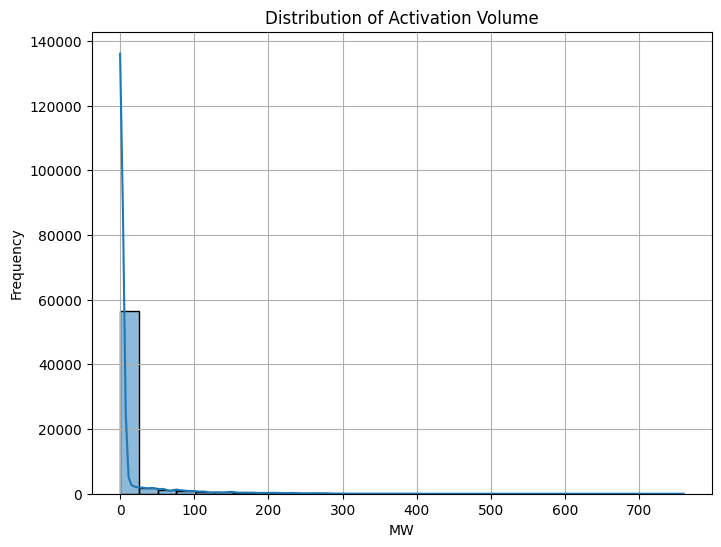

In [17]:
# Plot the distribution of the activation volume
plt.figure(figsize=(8, 6))
sns.histplot(df['Activation Volume-3'], bins=30, kde=True)
plt.title('Distribution of Activation Volume')
plt.xlabel('MW')
plt.ylabel('Frequency')
plt.grid()
plt.show()

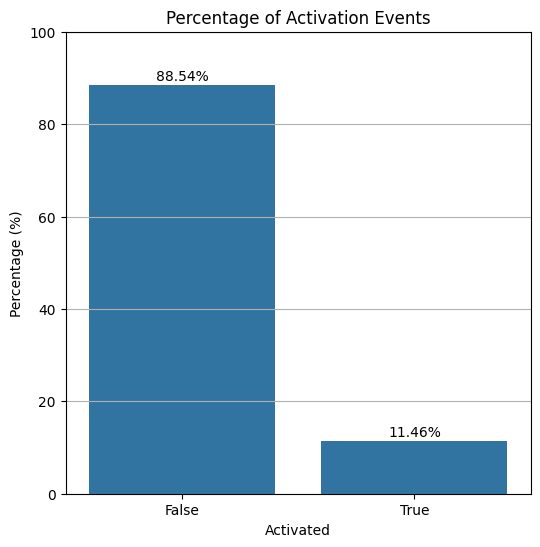

In [18]:
# Plot activation target histogram percentages
activation_counts = df['Activated'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
sns.barplot(x=activation_counts.index.astype(str), y=activation_counts.values)
plt.title('Percentage of Activation Events')
plt.xlabel('Activated')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for i, v in enumerate(activation_counts.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.grid(axis='y')
plt.show()


## Lag feature statistics

The code beneath calculates some statistics related to the activation patterns, such as the average number of consecutive activations and the probability of activation given previous activations in the last three intervals.

In [19]:
# Remove the first 3 rows as some of them contain NaN values due to lag features
df = df.dropna()

# Average number of consecutive activations
# Safely assign the new column using .loc
df.loc[:, 'Activation Change'] = df['Activated'].ne(df['Activated'].shift())

consecutive_activations = df.loc[df['Activated']].groupby(df['Activation Change'].cumsum()).size()
df.drop('Activation Change', axis=1, inplace=True)
average_consecutive_activations = consecutive_activations.mean()
average_consecutive_activations

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2440447962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Activation Change'] = df['Activated'].ne(df['Activated'].shift())
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2440447962.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Activation Change', axis=1, inplace=True)


np.float64(6.371927042030134)

The average number of consecutive activations is approximately 4 intervals, meaning that when an activation occurs, it tends to persist for about 4 consecutive 15-minute intervals on average.

In [20]:
# If an activation happened in the (t-1, t-2, t-3, persistent) intervals, what is the probability of an activation in the current interval?
""" for lag in ['Activated-3', 'Activated-4', 'Activated-5', 'Activated-6']:
    prob = df[df[lag]]['Activated+4'].mean() * 100
    print(f"Probability of activation given {lag} is True: {prob:.2f}%") """

' for lag in [\'Activated-3\', \'Activated-4\', \'Activated-5\', \'Activated-6\']:\n    prob = df[df[lag]][\'Activated+4\'].mean() * 100\n    print(f"Probability of activation given {lag} is True: {prob:.2f}%") '

This gives a rough picture of the predictability of an activation based on recent history. For instance, if there was an activation in the previous interval (t-1), the probability of an activation in the current interval is about 74.74%. This probability decreases as we look further back in time, indicating that recent activations are more predictive of current activations.

### Persistence
Persistence flags are interesting in this analysis as it seems that the probability of an activation in the next interval increases with the number of consecutive previous activations. This is evident from the 3 persistency features and the code above. To decrease feature complexity, and encoding all persistencies in one feature could be considered. For instance, a single feature could indicate the number of consecutive previous activations (0, 1, 2, 3, 4+), which might capture the same information with less complexity.

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\456879139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Persistency'] = 0


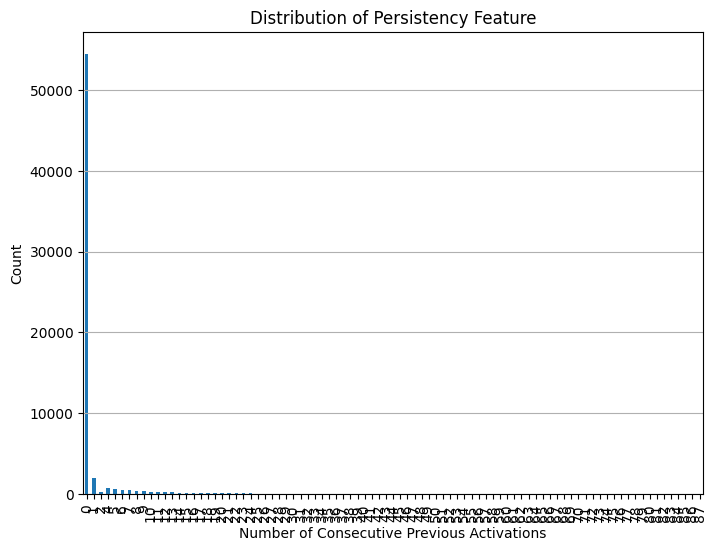

Persistency
0     54442
1      2000
2       193
4       729
5       603
      ...  
83        1
84        1
85        1
86        1
87        1
Name: count, Length: 87, dtype: int64

In [21]:
df['Persistency'] = 0

for index, row in df.iterrows():
    persistency_value = 0
    is_persistent = row['Activated-3']
    while is_persistent:
        persistency_value += 1
        # Index is timestamp, so we can shift by 15 minutes
        previous_index = index - pd.Timedelta(minutes=15 * persistency_value)
        if previous_index in df.index:
            is_persistent = df.loc[previous_index, 'Activated']
        else:
            break
    df.loc[index, 'Persistency'] = persistency_value
# Plot the distribution of the new Persistency feature
df['Persistency'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Persistency Feature')
plt.xlabel('Number of Consecutive Previous Activations')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

df['Persistency'].value_counts().sort_index()


# Lag feature statistics thoughts
Of course, t-1, t-2, and t-3 have the same number of True values, as they are just shifted versions of each other. However, the probability of activation given these lag features decreases as we look further back in time, indicating that more recent activations are more predictive of current activations.

Activation persistence is a very strong predictor. This is expected, as if there is say 10 activations in a row, it is quite unlikely that the next interval will be the one to stop the trend, as the system probably is in a state of disarray. The model will therefore likely learn to always predict activation if there has been persistent activation in the previous intervals. This is fine, but this sort of behaviour could be programmed in directly, without the need for a machine learning model. Therefore, the more interesting part of the problem is to predict the first activation in a sequence of activations. This is a more complex problem, as it requires understanding the underlying conditions that lead to the initial activation, rather than just following a trend.

In [22]:
df

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activated,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,Activated-7,Activated-8,Activated-9,Activation Volume-3,Persistency
Time,,,,,,,,,,,,,,,
2024-01-01 02:15:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,True,True,True,False,0.0,0
2024-01-01 02:30:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,False,True,True,True,0.0,0
2024-01-01 02:45:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,False,False,True,True,0.0,0
2024-01-01 03:00:00,0.562671,0.12516,0.093236,0.732200,False,False,False,False,False,False,False,False,True,0.0,0
2024-01-01 03:15:00,0.562671,0.12516,0.093236,0.732200,False,False,False,False,False,False,False,False,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12 23:30:00,0.901032,0.86830,0.253585,0.737088,False,False,True,True,True,False,True,True,False,35.0,1
2025-10-12 23:45:00,0.901032,0.86830,0.253585,0.737088,False,False,False,True,True,True,False,True,True,0.0,0
2025-10-13 00:00:00,0.905936,0.90208,0.240826,0.734783,False,False,False,False,True,True,True,False,True,0.0,0


# Temporal and seasonal features

In [23]:
df

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activated,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,Activated-7,Activated-8,Activated-9,Activation Volume-3,Persistency
Time,,,,,,,,,,,,,,,
2024-01-01 02:15:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,True,True,True,False,0.0,0
2024-01-01 02:30:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,False,True,True,True,0.0,0
2024-01-01 02:45:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,False,False,True,True,0.0,0
2024-01-01 03:00:00,0.562671,0.12516,0.093236,0.732200,False,False,False,False,False,False,False,False,True,0.0,0
2024-01-01 03:15:00,0.562671,0.12516,0.093236,0.732200,False,False,False,False,False,False,False,False,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12 23:30:00,0.901032,0.86830,0.253585,0.737088,False,False,True,True,True,False,True,True,False,35.0,1
2025-10-12 23:45:00,0.901032,0.86830,0.253585,0.737088,False,False,False,True,True,True,False,True,True,0.0,0
2025-10-13 00:00:00,0.905936,0.90208,0.240826,0.734783,False,False,False,False,True,True,True,False,True,0.0,0


In [24]:
import numpy as np
df.index = pd.to_datetime(df.index)
df['Hour'] = df.index.hour
df['Day of Week'] = df.index.dayofweek
df['Month'] = df.index.month

df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.drop('Hour', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Day of Week', axis=1, inplace=True)
df

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3850684472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df.index.hour
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3850684472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day of Week'] = df.index.dayofweek
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3850684472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activated,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,Activated-7,Activated-8,Activated-9,Activation Volume-3,Persistency,hour_sin,hour_cos,month_sin,month_cos
Time,,,,,,,,,,,,,,,,,,,
2024-01-01 02:15:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,True,True,True,False,0.0,0,0.500000,0.866025,0.500000,0.866025
2024-01-01 02:30:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,False,True,True,True,0.0,0,0.500000,0.866025,0.500000,0.866025
2024-01-01 02:45:00,0.555963,0.12906,0.082774,0.764329,False,False,False,False,False,False,False,True,True,0.0,0,0.500000,0.866025,0.500000,0.866025
2024-01-01 03:00:00,0.562671,0.12516,0.093236,0.732200,False,False,False,False,False,False,False,False,True,0.0,0,0.707107,0.707107,0.500000,0.866025
2024-01-01 03:15:00,0.562671,0.12516,0.093236,0.732200,False,False,False,False,False,False,False,False,False,0.0,0,0.707107,0.707107,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12 23:30:00,0.901032,0.86830,0.253585,0.737088,False,False,True,True,True,False,True,True,False,35.0,1,-0.258819,0.965926,-0.866025,0.500000
2025-10-12 23:45:00,0.901032,0.86830,0.253585,0.737088,False,False,False,True,True,True,False,True,True,0.0,0,-0.258819,0.965926,-0.866025,0.500000
2025-10-13 00:00:00,0.905936,0.90208,0.240826,0.734783,False,False,False,False,True,True,True,False,True,0.0,0,0.000000,1.000000,-0.866025,0.500000


# Forecasts

In [25]:
wind_forecast_df = pd.read_csv('data/Generation Forecasts for Wind and Solar_202501010000-202601010000.csv')

if INCLUDE_2024_DATA:
    wind_forecast_2024 = pd.read_csv('data/Generation Forecasts for Wind and Solar_202401010000-202501010000.csv')
    wind_forecast_df = pd.concat([wind_forecast_2024, wind_forecast_df], ignore_index=True)
wind_forecast_df.rename(columns={"MTU (CET/CEST)": "Time"}, inplace=True)
wind_forecast_df['Time'] = wind_forecast_df['Time'].str[:16]
wind_forecast_df['Time'] = pd.to_datetime(wind_forecast_df['Time'], format='%d.%m.%Y %H:%M')
wind_forecast_df.set_index('Time', inplace=True)
wind_forecast_df

,Generation - Solar [MW] Day Ahead/ BZN|NO1,Generation - Solar [MW] Intraday / BZN|NO1,Generation - Solar [MW] Current / BZN|NO1,Generation - Wind Offshore [MW] Day Ahead/ BZN|NO1,Generation - Wind Offshore [MW] Intraday / BZN|NO1,Generation - Wind Offshore [MW] Current / BZN|NO1,Generation - Wind Onshore [MW] Day Ahead/ BZN|NO1,Generation - Wind Onshore [MW] Intraday / BZN|NO1,Generation - Wind Onshore [MW] Current / BZN|NO1
Time,,,,,,,,,
2024-01-01 00:00:00,0.0,n/e,0.0,n/e,n/e,n/e,169.0,n/e,99.0
2024-01-01 01:00:00,0.0,n/e,0.0,n/e,n/e,n/e,173.0,n/e,104.0
2024-01-01 02:00:00,0.0,n/e,0.0,n/e,n/e,n/e,175.0,n/e,107.0
2024-01-01 03:00:00,0.0,n/e,0.0,n/e,n/e,n/e,175.0,n/e,108.0
2024-01-01 04:00:00,0.0,n/e,0.0,n/e,n/e,n/e,179.0,n/e,107.0
...,...,...,...,...,...,...,...,...,...
2025-12-31 22:45:00,-,-,NaN,n/e,n/e,n/e,-,-,NaN
2025-12-31 23:00:00,-,-,NaN,n/e,n/e,n/e,-,-,NaN
2025-12-31 23:15:00,-,-,NaN,n/e,n/e,n/e,-,-,NaN


In [26]:
# From 01.01.2025 to 17.03.2025 01:00 the forecasts are hourly, then 15-minute intervals
# Resample to 15-minute intervals using forward fill
# Remove duplicate index entries, keeping the first occurrence
wind_forecast_df = wind_forecast_df[~wind_forecast_df.index.duplicated(keep='first')]

# Now resample to 15-minute intervals using forward fill
wind_forecast_df = wind_forecast_df.resample('15min').ffill()
wind_forecast_df

,Generation - Solar [MW] Day Ahead/ BZN|NO1,Generation - Solar [MW] Intraday / BZN|NO1,Generation - Solar [MW] Current / BZN|NO1,Generation - Wind Offshore [MW] Day Ahead/ BZN|NO1,Generation - Wind Offshore [MW] Intraday / BZN|NO1,Generation - Wind Offshore [MW] Current / BZN|NO1,Generation - Wind Onshore [MW] Day Ahead/ BZN|NO1,Generation - Wind Onshore [MW] Intraday / BZN|NO1,Generation - Wind Onshore [MW] Current / BZN|NO1
Time,,,,,,,,,
2024-01-01 00:00:00,0.0,n/e,0.0,n/e,n/e,n/e,169.0,n/e,99.0
2024-01-01 00:15:00,0.0,n/e,0.0,n/e,n/e,n/e,169.0,n/e,99.0
2024-01-01 00:30:00,0.0,n/e,0.0,n/e,n/e,n/e,169.0,n/e,99.0
2024-01-01 00:45:00,0.0,n/e,0.0,n/e,n/e,n/e,169.0,n/e,99.0
2024-01-01 01:00:00,0.0,n/e,0.0,n/e,n/e,n/e,173.0,n/e,104.0
...,...,...,...,...,...,...,...,...,...
2025-12-31 22:45:00,-,-,NaN,n/e,n/e,n/e,-,-,NaN
2025-12-31 23:00:00,-,-,NaN,n/e,n/e,n/e,-,-,NaN
2025-12-31 23:15:00,-,-,NaN,n/e,n/e,n/e,-,-,NaN


In [27]:
import pandas as pd

# Ensure columns are numeric, coercing errors to NaN
wind_forecast_df['Generation - Wind Onshore [MW] Day Ahead/ BZN|NO1'] = pd.to_numeric(
    wind_forecast_df['Generation - Wind Onshore [MW] Day Ahead/ BZN|NO1'], errors='coerce'
)
wind_forecast_df['Generation - Wind Onshore [MW] Intraday / BZN|NO1'] = pd.to_numeric(
    wind_forecast_df['Generation - Wind Onshore [MW] Intraday / BZN|NO1'], errors='coerce'
)

df['wind_da_t+4'] = wind_forecast_df['Generation - Wind Onshore [MW] Day Ahead/ BZN|NO1'].shift(-4)
df['wind_id_t+4'] = wind_forecast_df['Generation - Wind Onshore [MW] Intraday / BZN|NO1'].shift(-4)
df.dropna(inplace=True)
df['wind_error_t+4'] = abs(df['wind_id_t+4'] - df['wind_da_t+4'])
df.dtypes


C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3221605254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_da_t+4'] = wind_forecast_df['Generation - Wind Onshore [MW] Day Ahead/ BZN|NO1'].shift(-4)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3221605254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_id_t+4'] = wind_forecast_df['Generation - Wind Onshore [MW] Intraday / BZN|NO1'].shift(-4)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3221605254.py:13: SettingWithCopyW

NO1-NO2_ratio          float64
NO1-NO3_ratio          float64
NO1-NO5_ratio          float64
NO1-SE3_ratio          float64
Activated                 bool
Activated+4             object
Activated-3             object
Activated-4             object
Activated-5             object
Activated-6             object
Activated-7             object
Activated-8             object
Activated-9             object
Activation Volume-3    float64
Persistency              int64
hour_sin               float64
hour_cos               float64
month_sin              float64
month_cos              float64
wind_da_t+4            float64
wind_id_t+4            float64
wind_error_t+4         float64
dtype: object

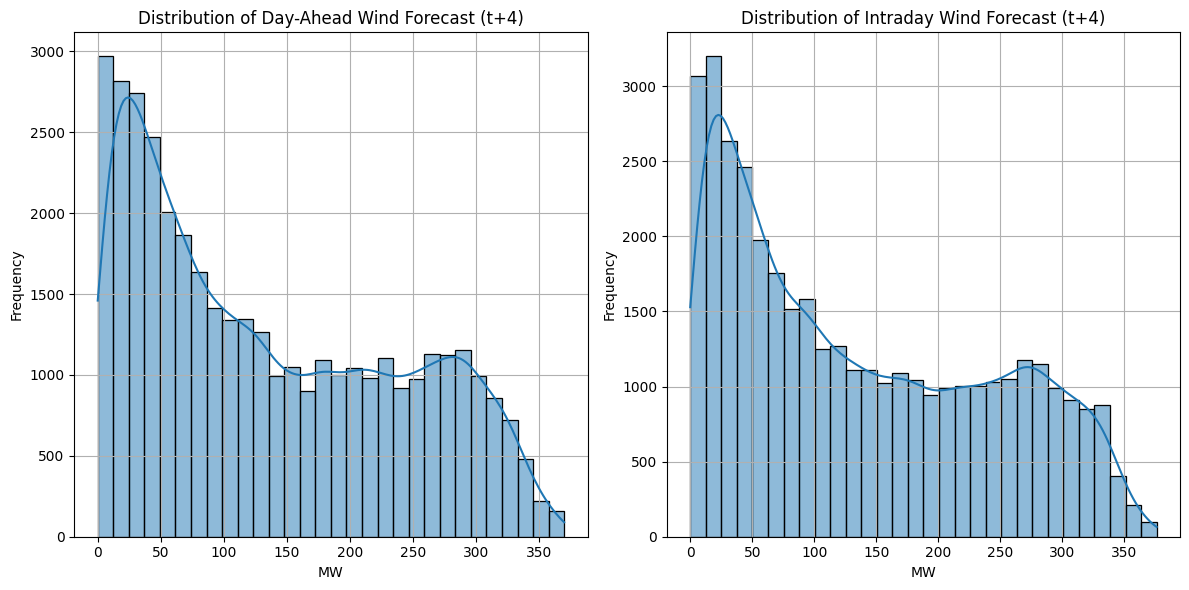

In [28]:
# Plot value distribution of wind_da_t+4 and wind_id_t+4
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['wind_da_t+4'], bins=30, kde=True)
plt.title('Distribution of Day-Ahead Wind Forecast (t+4)')
plt.xlabel('MW')
plt.ylabel('Frequency')
plt.grid()
plt.subplot(1, 2, 2)
sns.histplot(df['wind_id_t+4'], bins=30, kde=True)
plt.title('Distribution of Intraday Wind Forecast (t+4)')
plt.xlabel('MW')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


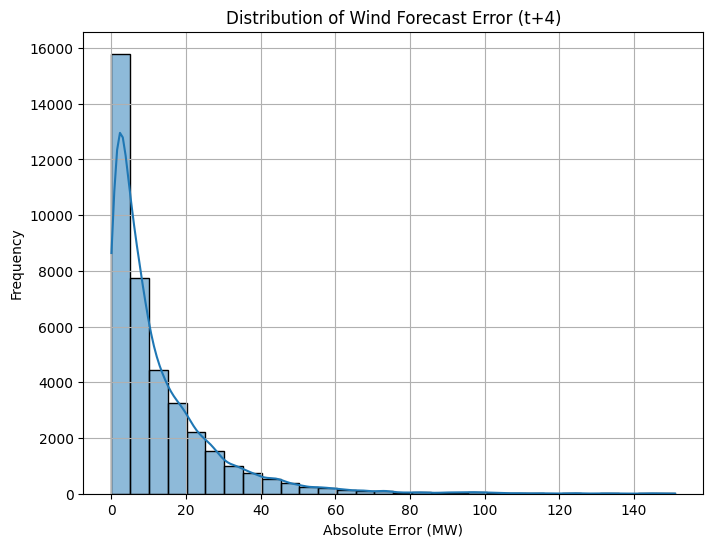

In [29]:
# plot value distribution of wind_error_t+4
plt.figure(figsize=(8, 6))
sns.histplot(df['wind_error_t+4'], bins=30, kde=True)
plt.title('Distribution of Wind Forecast Error (t+4)')
plt.xlabel('Absolute Error (MW)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Consumption and Production


In [30]:
consumption_df = pd.read_csv('data/Consumption_2025_NO1_None_MW.csv', delimiter=';')
# Consumption
if INCLUDE_2024_DATA:
    consumption_df_2024 = pd.read_csv('data/Consumption_2024_NO1_None_MW.csv', delimiter=';')
    consumption_df = pd.concat([consumption_df_2024, consumption_df], ignore_index=True)
# Production
production_df = pd.read_csv('data/Production_2025_NO1_None_MW.csv', delimiter=';')
if INCLUDE_2024_DATA:
    production_df_2024 = pd.read_csv('data/Production_2024_NO1_None_MW.csv', delimiter=';')
    production_df = pd.concat([production_df_2024, production_df], ignore_index=True)
consumption_df

,Delivery Start (CET),Delivery End (CET),NO1 Volume (MW)
0,01.01.2024 00:00:00,01.01.2024 01:00:00,5239
1,01.01.2024 01:00:00,01.01.2024 02:00:00,5219
2,01.01.2024 02:00:00,01.01.2024 03:00:00,5226
3,01.01.2024 03:00:00,01.01.2024 04:00:00,5183
4,01.01.2024 04:00:00,01.01.2024 05:00:00,5168
...,...,...,...
30732,12.10.2025 22:45:00,12.10.2025 23:00:00,3502
30733,12.10.2025 23:00:00,12.10.2025 23:15:00,3449
30734,12.10.2025 23:15:00,12.10.2025 23:30:00,3410
30735,12.10.2025 23:30:00,12.10.2025 23:45:00,3376


In [31]:
production_df

,Delivery Start (CET),Delivery End (CET),NO1 Biomass (MW),NO1 Fossil Gas (MW),NO1 Hydro Run Of River And Poundage (MW),NO1 Hydro Water Reservoir (MW),NO1 Solar (MW),NO1 Waste (MW),NO1 Wind Onshore (MW),NO1 Total (MW)
0,01.01.2024 00:00:00,01.01.2024 01:00:00,0,0,932,411,NaN,16,93,1452
1,01.01.2024 01:00:00,01.01.2024 02:00:00,0,0,930,176,NaN,17,95,1218
2,01.01.2024 02:00:00,01.01.2024 03:00:00,0,0,926,177,NaN,16,91,1210
3,01.01.2024 03:00:00,01.01.2024 04:00:00,0,0,926,176,NaN,16,97,1215
4,01.01.2024 04:00:00,01.01.2024 05:00:00,0,0,908,175,NaN,15,106,1204
...,...,...,...,...,...,...,...,...,...,...
29010,12.10.2025 22:45:00,12.10.2025 23:00:00,0,0,1531,528,0.0,6,187,2252
29011,12.10.2025 23:00:00,12.10.2025 23:15:00,0,0,1537,547,0.0,7,186,2277
29012,12.10.2025 23:15:00,12.10.2025 23:30:00,0,0,1536,655,0.0,7,170,2368
29013,12.10.2025 23:30:00,12.10.2025 23:45:00,0,0,1537,665,0.0,7,157,2366


In [32]:
# Datetime and resample to 15-minute intervals using forward fill
for frame in [consumption_df, production_df]:
    frame.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
    frame.drop('Delivery End (CET)', axis=1, inplace=True)
    frame['Time'] = pd.to_datetime(frame['Time'], format='%d.%m.%Y %H:%M:%S')
    frame.set_index('Time', inplace=True)

In [33]:
consumption_df = consumption_df[~consumption_df.index.duplicated(keep='first')]
production_df = production_df[~production_df.index.duplicated(keep='first')]
consumption_df = consumption_df.resample('15min').ffill()
production_df = production_df.resample('15min').ffill()
production_df

,NO1 Biomass (MW),NO1 Fossil Gas (MW),NO1 Hydro Run Of River And Poundage (MW),NO1 Hydro Water Reservoir (MW),NO1 Solar (MW),NO1 Waste (MW),NO1 Wind Onshore (MW),NO1 Total (MW)
Time,,,,,,,,
2024-01-01 00:00:00,0,0,932,411,NaN,16,93,1452
2024-01-01 00:15:00,0,0,932,411,NaN,16,93,1452
2024-01-01 00:30:00,0,0,932,411,NaN,16,93,1452
2024-01-01 00:45:00,0,0,932,411,NaN,16,93,1452
2024-01-01 01:00:00,0,0,930,176,NaN,17,95,1218
...,...,...,...,...,...,...,...,...
2025-10-12 22:45:00,0,0,1531,528,0.0,6,187,2252
2025-10-12 23:00:00,0,0,1537,547,0.0,7,186,2277
2025-10-12 23:15:00,0,0,1536,655,0.0,7,170,2368


In [34]:
# Merge consumption and production data into main df
df['Consumption'] = consumption_df['NO1 Volume (MW)'].shift(4) # t-4
df['Wind Production'] = production_df['NO1 Wind Onshore (MW)'].shift(4)
df['Total Production'] = production_df['NO1 Total (MW)'].shift(4)
df['Wind Share'] = df['Wind Production'] / df['Total Production']
df['Consumption minus Production'] = df['Consumption'] - df['Total Production']
df.dropna(inplace=True)
df

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\386068151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumption'] = consumption_df['NO1 Volume (MW)'].shift(4) # t-4
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\386068151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind Production'] = production_df['NO1 Wind Onshore (MW)'].shift(4)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\386068151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activated,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,...,month_sin,month_cos,wind_da_t+4,wind_id_t+4,wind_error_t+4,Consumption,Wind Production,Total Production,Wind Share,Consumption minus Production
Time,,,,,,,,,,,,,,,,,,,,,
2024-09-03 23:00:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,-1.000000,-1.836970e-16,245.0,249.0,4.0,3081.0,271.0,3028.0,0.089498,53.0
2024-09-03 23:15:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,-1.000000,-1.836970e-16,245.0,249.0,4.0,3081.0,271.0,3028.0,0.089498,53.0
2024-09-03 23:30:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,-1.000000,-1.836970e-16,245.0,249.0,4.0,3081.0,271.0,3028.0,0.089498,53.0
2024-09-03 23:45:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,-1.000000,-1.836970e-16,245.0,249.0,4.0,3081.0,271.0,3028.0,0.089498,53.0
2024-09-04 00:00:00,0.821155,0.14104,0.243013,0.261928,False,False,False,False,False,False,...,-1.000000,-1.836970e-16,241.0,245.0,4.0,2815.0,269.0,2873.0,0.093630,-58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12 22:45:00,0.904305,0.85274,0.266087,0.733236,True,False,False,True,True,False,...,-0.866025,5.000000e-01,198.0,233.0,35.0,3662.0,209.0,2297.0,0.090988,1365.0
2025-10-12 23:00:00,0.901032,0.86830,0.253585,0.737088,False,False,True,False,True,True,...,-0.866025,5.000000e-01,189.0,150.0,39.0,3627.0,205.0,2276.0,0.090070,1351.0
2025-10-12 23:15:00,0.901032,0.86830,0.253585,0.737088,False,False,True,True,False,True,...,-0.866025,5.000000e-01,186.0,147.0,39.0,3600.0,186.0,2233.0,0.083296,1367.0


### Imports and consumption ratio

In [35]:
sum_import = physical_flow_df[['NO2-NO1', 'NO3-NO1', 'NO5-NO1', 'SE3-NO1']].sum(axis=1)
df['Total Imports'] = sum_import.shift(4) # t-4
sum_import -= physical_flow_df[['NO1-NO2', 'NO1-NO3', 'NO1-NO5', 'NO1-SE3']].sum(axis=1)
df['Net Import'] = sum_import.shift(4) # t-4
df['Import/Consumption'] = df['Net Import'] / df['Consumption']


C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2309405560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Imports'] = sum_import.shift(4) # t-4
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2309405560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Net Import'] = sum_import.shift(4) # t-4
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2309405560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [36]:
df['Residual Load'] = df['Consumption'] - df['Wind Production']
df['Residual Load Delta'] = df['Residual Load'].diff()
#df.drop('Consumption', axis=1, inplace=True)
#df.drop('Total Production', axis=1, inplace=True)

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3915224693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residual Load'] = df['Consumption'] - df['Wind Production']
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3915224693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residual Load Delta'] = df['Residual Load'].diff()


# Day-ahead and intraday prices

In [37]:
da_df = pd.read_csv('data/AuctionPrice_2025_DayAhead_NO1_EUR_None.csv', delimiter=';')
# Day-ahead prices
if INCLUDE_2024_DATA:
    da_df_2024 = pd.read_csv('data/AuctionPrice_2024_DayAhead_NO1_EUR_None.csv', delimiter=';')
    da_df = pd.concat([da_df_2024, da_df], ignore_index=True)
id_df = pd.read_csv('data/AuctionPrice_2025_SIDC_IntradayAuction1_NO1_EUR_None.csv', delimiter=';')
# Intraday prices
id_df = pd.read_csv('data/AuctionPrice_2025_SIDC_IntradayAuction1_NO1_EUR_None.csv', delimiter=';')
if INCLUDE_2024_DATA:
    id_df_2024 = pd.read_csv('data/AuctionPrice_2024_SIDC_IntradayAuction1_NO1_EUR_None.csv', delimiter=';')
    id_df = pd.concat([id_df_2024, id_df], ignore_index=True)
da_df

,Delivery Start (CET),Delivery End (CET),NO1 Price (EUR)
0,01.01.2024 00:00:00,01.01.2024 01:00:00,53.79
1,01.01.2024 01:00:00,01.01.2024 02:00:00,48.98
2,01.01.2024 02:00:00,01.01.2024 03:00:00,27.45
3,01.01.2024 03:00:00,01.01.2024 04:00:00,24.48
4,01.01.2024 04:00:00,01.01.2024 05:00:00,24.01
...,...,...,...
16674,14.10.2025 22:45:00,14.10.2025 23:00:00,64.64
16675,14.10.2025 23:00:00,14.10.2025 23:15:00,64.80
16676,14.10.2025 23:15:00,14.10.2025 23:30:00,64.65
16677,14.10.2025 23:30:00,14.10.2025 23:45:00,64.45


In [38]:
da_df['Delivery Start (CET)'] = pd.to_datetime(da_df['Delivery Start (CET)'], format='%d.%m.%Y %H:%M:%S')
da_df.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
da_df.set_index('Time', inplace=True)
# Remove duplicate which occurs at the year shift
da_df = da_df[~da_df.index.duplicated(keep='first')]
da_df = da_df.resample('15min').ffill()

id_df['Delivery Start (CET)'] = pd.to_datetime(id_df['Delivery Start (CET)'], format='%d.%m.%Y %H:%M:%S')
id_df.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
id_df.set_index('Time', inplace=True)
id_df = id_df[~id_df.index.duplicated(keep='first')]
id_df = id_df.resample('15min').ffill()

df['DA Price'] = da_df['NO1 Price (EUR)'].shift(-4) # t+4
df['ID Price'] = id_df['NO1 Price (EUR)'].shift(-4) # t+4
df['Price Diff'] = df['ID Price'] - df['DA Price']
df.dropna(inplace=True)


C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1867467617.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DA Price'] = da_df['NO1 Price (EUR)'].shift(-4) # t+4
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1867467617.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID Price'] = id_df['NO1 Price (EUR)'].shift(-4) # t+4
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1867467617.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

### Intraday Hourly Statistics

In [39]:
import pandas as pd
INCLUDE_2024_DATA = False # Whether to include data from 2024 or not
id_hourly_df = pd.read_csv('data/IntradayHourlyStatistics_2025_NO1_None.csv', delimiter=';')
if INCLUDE_2024_DATA:
    id_hourly_2024 = pd.read_csv('data/IntradayHourlyStatistics_2024_NO1_None.csv', delimiter=';')
    id_hourly_df = pd.concat([id_hourly_2024, id_hourly_df], ignore_index=True)
id_hourly_df.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
id_hourly_df['Time'] = pd.to_datetime(id_hourly_df['Time'], format='%d.%m.%Y %H:%M:%S')

for col in ['NO1 High Price (EUR/MWh)', 'NO1 Low Price (EUR/MWh)',
            'NO1 Open Price (EUR/MWh)', 'NO1 Close Price (EUR/MWh)',
            'NO1 Average Price (EUR/MWh)']:
    id_hourly_df[col] = pd.to_numeric(id_hourly_df[col], errors='coerce')
    # Better than filling with 0: use time interpolation and forward/backward fill as fallback
    
    id_hourly_df[col].fillna(method='ffill', inplace=True)
    id_hourly_df[col].fillna(method='bfill', inplace=True)
id_hourly_df.set_index('Time', inplace=True)
id_hourly_df = id_hourly_df[~id_hourly_df.index.duplicated(keep='first')]
id_hourly_df = id_hourly_df.resample('15min').ffill()
# Shift by -4 to align with t+4
id_hourly_df = id_hourly_df.shift(-4)

id_hourly_df.head(5)

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1006578745.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  id_hourly_df[col].fillna(method='ffill', inplace=True)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1006578745.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  id_hourly_df[col].fillna(method='ffill', inplace=True)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1006578745.py:17: FutureWarning: A value is trying to b

,Delivery End (CET),NO1 High Price (EUR/MWh),NO1 Low Price (EUR/MWh),NO1 Open Price (EUR/MWh),NO1 Close Price (EUR/MWh),NO1 Average Price (EUR/MWh),NO1 Volume (MW),NO1 Buy Volume (MW),NO1 Sell Volume (MW),NO1 Average Price Last 3 H (EUR/MWh),NO1 Open Trade Time (CET),NO1 Close Trade Time (CET),NO1 Average Price Last 1 H (EUR/MWh)
Time,,,,,,,,,,,,,
2025-01-01 00:00:00,01.01.2025 02:00:00,19.37,16.00,17.32,16.00,16.95,42.3,39.8,2.5,16.95,31.12.2024 20:04:46,31.12.2024 23:59:39,NaN
2025-01-01 00:15:00,01.01.2025 02:00:00,19.37,16.00,17.32,16.00,16.95,42.3,39.8,2.5,16.95,31.12.2024 20:04:46,31.12.2024 23:59:39,NaN
2025-01-01 00:30:00,01.01.2025 02:00:00,19.37,16.00,17.32,16.00,16.95,42.3,39.8,2.5,16.95,31.12.2024 20:04:46,31.12.2024 23:59:39,NaN
2025-01-01 00:45:00,01.01.2025 02:00:00,19.37,16.00,17.32,16.00,16.95,42.3,39.8,2.5,16.95,31.12.2024 20:04:46,31.12.2024 23:59:39,NaN
2025-01-01 01:00:00,01.01.2025 03:00:00,21.28,3.76,16.88,16.71,9.63,73.1,51.7,21.4,13.94,31.12.2024 16:29:41,01.01.2025 00:53:01,NaN


In [40]:
# Features
df['ID High Price'] = id_hourly_df['NO1 High Price (EUR/MWh)']
df['ID Low Price'] = id_hourly_df['NO1 Low Price (EUR/MWh)']
df['ID Open Price'] = id_hourly_df['NO1 Open Price (EUR/MWh)']
df['ID Close Price'] = id_hourly_df['NO1 Close Price (EUR/MWh)']
df['ID Average Price'] = id_hourly_df['NO1 Average Price (EUR/MWh)']
df['ID Price Range'] = df['ID High Price'] - df['ID Low Price']



C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2363980416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID High Price'] = id_hourly_df['NO1 High Price (EUR/MWh)']
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2363980416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID Low Price'] = id_hourly_df['NO1 Low Price (EUR/MWh)']
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\2363980416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

# Regime features and interaction terms


In [41]:

# Ensure datetime index
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# --- Wind forecast error lags (match notebook names) ---
if 'wind_error_t+4' in df.columns:
    df['wind_error_t+3'] = df['wind_error_t+4'].shift(1)
    df['wind_error_t+2'] = df['wind_error_t+4'].shift(2)
    df['wind_error_t+1'] = df['wind_error_t+4'].shift(3)

# --- Residual load and ramps ---
if ('Consumption' in df.columns) and ('Wind Production' in df.columns):
    df['Residual Load'] = df['Consumption'] - df['Wind Production']
    df['Residual Load Delta'] = df['Residual Load'].diff()

# --- Net import ramp ---
if 'Net Import' in df.columns:
    df['Net Import Ramp'] = df['Net Import'].diff()

# --- Price diff and price-related interactions ---
if ('DA Price' in df.columns) and ('ID Price' in df.columns):
    df['Price Diff'] = df['ID Price'] - df['DA Price']
    # Common interactions (only create if base columns exist)
    if 'Wind Share' in df.columns:
        df['Wind Share x Price Diff'] = df['Wind Share'] * df['Price Diff']
    if 'Residual Load' in df.columns:
        df['Residual Load x Price Diff'] = df['Residual Load'] * df['Price Diff']
        df['Residual Load Delta x Price Diff'] = df['Residual Load Delta'] * df['Price Diff']
    if 'Import/Consumption' in df.columns:
        df['Import/Consumption x Price Diff'] = df['Import/Consumption'] * df['Price Diff']
    if 'Persistency' in df.columns:
        df['Persistency x Price Diff'] = df['Persistency'] * df['Price Diff']
    if 'ID Open Price' in df.columns:
        df['ID Open Price x Price Diff'] = df['ID Open Price'] * df['Price Diff']
    # price spread
    df['ID Open Price - Day Ahead Price'] = df['ID Open Price'] - df['DA Price'] if 'ID Open Price' in df.columns else np.nan

# --- Intraday hourly statistics interactions (limited pairwise to avoid blow-up) ---
stats = ['ID High Price', 'ID Low Price', 'ID Open Price', 'ID Close Price', 'ID Average Price']
present_stats = [s for s in stats if s in df.columns]
for stat in present_stats:
    if 'Price Diff' in df.columns:
        df[f'{stat} x Price Diff'] = df[stat] * df['Price Diff']
    if 'Residual Load' in df.columns:
        df[f'{stat} x Residual Load'] = df[stat] * df['Residual Load']
    if 'Wind Share' in df.columns:
        df[f'{stat} x Wind Share'] = df[stat] * df['Wind Share']
# limited pairwise interactions (first few pairs)
for i, s1 in enumerate(present_stats):
    for s2 in present_stats[i+1:i+4]:
        df[f'{s1} x {s2}'] = df[s1] * df[s2]


# --- Cross-zone ratio interactions (NO1-<ZONE>_ratio assumed present) ---
for zone in ['NO2','NO3','NO5','SE3']:
    ratio_col = f'NO1-{zone}_ratio'
    if ratio_col in df.columns:
        if 'Price Diff' in df.columns:
            df[f'{ratio_col} x Price Diff'] = df[ratio_col] * df['Price Diff']
        if 'Residual Load' in df.columns:
            df[f'{ratio_col} x Residual Load'] = df[ratio_col] * df['Residual Load']
        if 'Wind Share' in df.columns:
            df[f'{ratio_col} x Wind Share'] = df[ratio_col] * df['Wind Share']


# Quick sanity checks (print small report)
print("Rows:", len(df))
print("Null counts (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("Sample columns added:", [c for c in df.columns if any(x in c for x in ['Persistency','Activated-','wind_error_t+','Price Diff','Residual Load','Peak'])][:20])

Rows: 38775
Null counts (top 10):
ID Average Price x Residual Load    11427
ID Average Price x Wind Share       11427
ID High Price x ID Low Price        11427
ID High Price x ID Open Price       11427
ID High Price x ID Close Price      11427
ID Low Price x ID Open Price        11427
ID Low Price x ID Close Price       11427
ID Low Price x ID Average Price     11427
ID Open Price x ID Close Price      11427
ID Open Price x ID Average Price    11427
dtype: int64
Sample columns added: ['Activated-3', 'Activated-4', 'Activated-5', 'Activated-6', 'Activated-7', 'Activated-8', 'Activated-9', 'Persistency', 'wind_error_t+4', 'Residual Load', 'Residual Load Delta', 'Price Diff', 'wind_error_t+3', 'wind_error_t+2', 'wind_error_t+1', 'Wind Share x Price Diff', 'Residual Load x Price Diff', 'Residual Load Delta x Price Diff', 'Import/Consumption x Price Diff', 'Persistency x Price Diff']


C:\Users\haako\AppData\Local\Temp\ipykernel_17816\983023143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_error_t+3'] = df['wind_error_t+4'].shift(1)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\983023143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_error_t+2'] = df['wind_error_t+4'].shift(2)
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\983023143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [42]:
# Peak feature
df['Peak Hour'] = df.index.hour.isin(range(8, 20)) # 08:00-19:00
df['Working Day'] = df.index.dayofweek.isin(range(0, 5)) # Monday-Friday
df['Peak'] = df['Peak Hour'] & df['Working Day']
df.drop(columns=['Peak Hour'], inplace=True)

if INCLUDE_2024_DATA:
    df['Year'] = df.index.year
    # Season
    df['Season'] = df.index.month % 12 // 3 + 1

# Interaction terms
df['Wind Share x Price Diff'] = df['Wind Share'] * df['Price Diff']
df['Residual Load x Price Diff'] = df['Residual Load'] * df['Price Diff']
df['Residual Load Delta x Price Diff'] = df['Residual Load Delta'] * df['Price Diff']
df['Import/Consumption x Price Diff'] = df['Import/Consumption'] * df['Price Diff']
df['Persistency x Price Diff'] = df['Persistency'] * df['Price Diff']
df['Peak x Price Diff'] = df['Peak'] * df['Price Diff']
df['Peak x Residual Load'] = df['Peak'] * df['Residual Load']
df['Peak x Wind Share'] = df['Peak'] * df['Wind Share']
df['Residual Load x Price Spread'] = df['Residual Load'] * (df['ID Price'] - df['DA Price'])
df['Wind Share x Price Spread'] = df['Wind Share'] * (df['ID Price'] - df['DA Price'])
df['Net Import x Consumption'] = df['Net Import'] * df['Consumption']

# Since you have cross-zonal flow ratios, interact them with price signals
for zone in ['NO2', 'NO3', 'NO5', 'SE3']:
    ratio_col = f'NO1-{zone}_ratio'
    df[f'{ratio_col} x Price Diff'] = df[ratio_col] * df['Price Diff']
    df[f'{ratio_col} x Residual Load'] = df[ratio_col] * df['Residual Load']
    df[f'{ratio_col} x Wind Share'] = df[ratio_col] * df['Wind Share']

# Combine lag information with current conditions
df['Activated-3 x Price Diff'] = df['Activated-3'] * df['Price Diff']
df['Activated-3 x Residual Load'] = df['Activated-3'] * df['Residual Load']
df['Activated-4 x Residual Load'] = df['Activated-4'] * df['Residual Load']
df['Activation Volume-3 x Price Diff'] = df['Activation Volume-3'] * df['Price Diff']
df['Activation Volume-3 x Residual Load'] = df['Activation Volume-3'] * df['Residual Load']

# ID open price interactions
df['ID Open Price x Price Diff'] = df['ID Open Price'] * df['Price Diff']
df['ID Open Price x Wind Share'] = df['ID Open Price'] * df['Wind Share']
df['ID Open Price x Import/Consumption'] = df['ID Open Price'] * df['Import/Consumption']
df['ID Open Price x Activation Volume-3'] = df['ID Open Price'] * df['Activation Volume-3']
df['ID Open Price - Day Ahead Price'] = df['ID Open Price'] - df['DA Price']
df['ID Price Range x Price Diff'] = df['ID Price Range'] * df['Price Diff']


# Intraday hourly statistics interactions
for stat in ['ID High Price', 'ID Low Price', 'ID Open Price', 'ID Close Price', 'ID Average Price']:
    df[f'{stat} x Price Diff'] = df[stat] * df['Price Diff']
    df[f'{stat} x Residual Load'] = df[stat] * df['Residual Load']
    df[f'{stat} x Wind Share'] = df[stat] * df['Wind Share']
    df[f'{stat} x Import/Consumption'] = df[stat] * df['Import/Consumption']

# Interactions between hourly statistics 
for i, stat1 in enumerate(['ID High Price', 'ID Low Price', 'ID Open Price', 'ID Close Price', 'ID Average Price']):
    for stat2 in ['ID High Price', 'ID Low Price', 'ID Open Price', 'ID Close Price', 'ID Average Price'][i+1:]:
        df[f'{stat1} x {stat2}'] = df[stat1] * df[stat2]
# Three-way interactions for complex relationships
df['Peak x Wind Share x Price Diff'] = df['Peak'] * df['Wind Share'] * df['Price Diff']
df['Residual Load x Import/Consumption x Price Diff'] = df['Residual Load'] * df['Import/Consumption'] * df['Price Diff']
# Interactions that might indicate grid stress
df['High Import x Low Wind'] = (df['Import/Consumption'] > df['Import/Consumption'].quantile(0.75)) * (df['Wind Share'] < df['Wind Share'].quantile(0.25))
df['Cross Border Stress'] = df['Net Import'] * df['Price Diff']  # High import + high price diff might indicate congestion


df

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1459876725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Peak Hour'] = df.index.hour.isin(range(8, 20)) # 08:00-19:00
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1459876725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Working Day'] = df.index.dayofweek.isin(range(0, 5)) # Monday-Friday
C:\Users\haako\AppData\Local\Temp\ipykernel_17816\1459876725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activated,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,...,ID Price Range x Price Diff,ID High Price x Import/Consumption,ID Low Price x Import/Consumption,ID Close Price x Import/Consumption,ID Average Price x Import/Consumption,ID High Price x ID Average Price,Peak x Wind Share x Price Diff,Residual Load x Import/Consumption x Price Diff,High Import x Low Wind,Cross Border Stress
Time,,,,,,,,,,,,,,,,,,,,,
2024-09-03 23:15:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-518.771967,False,-568.8030
2024-09-03 23:30:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-518.771967,False,-568.8030
2024-09-03 23:45:00,0.802182,0.15898,0.241403,0.271484,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-518.771967,False,-568.8030
2024-09-04 00:00:00,0.821155,0.14104,0.243013,0.261928,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-740.236612,False,-818.4470
2024-09-04 00:15:00,0.821155,0.14104,0.243013,0.261928,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-740.236612,False,-818.4470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12 22:45:00,0.904305,0.85274,0.266087,0.733236,True,False,False,True,True,False,...,-14.94,14.938700,13.218313,14.049833,13.791775,2506.01,-0.0,-2465.307067,False,-2614.5249
2025-10-12 23:00:00,0.901032,0.86830,0.253585,0.737088,False,False,True,False,True,True,...,0.00,16.442082,13.376609,14.184779,13.783481,2918.14,0.0,0.000000,False,0.0000
2025-10-12 23:15:00,0.901032,0.86830,0.253585,0.737088,False,False,True,True,False,True,...,-22.22,16.565397,13.476933,14.291165,13.886857,2918.14,-0.0,-1936.264704,False,-2041.7554


# Learning

In [43]:
# Split data into training and testing sets based on time
df.drop('Activated', axis=1, inplace=True)
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]
test_df

C:\Users\haako\AppData\Local\Temp\ipykernel_17816\3435860282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Activated', axis=1, inplace=True)


,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,Activated+4,Activated-3,Activated-4,Activated-5,Activated-6,Activated-7,...,ID Price Range x Price Diff,ID High Price x Import/Consumption,ID Low Price x Import/Consumption,ID Close Price x Import/Consumption,ID Average Price x Import/Consumption,ID High Price x ID Average Price,Peak x Wind Share x Price Diff,Residual Load x Import/Consumption x Price Diff,High Import x Low Wind,Cross Border Stress
Time,,,,,,,,,,,,,,,,,,,,,
2025-07-24 04:15:00,0.097605,0.59338,0.253992,0.203776,False,False,False,False,False,False,...,538.384,14.218016,5.796576,14.218016,13.110651,2493.400,0.0,9678.367353,False,9730.9412
2025-07-24 04:30:00,0.097605,0.59338,0.253992,0.203776,False,False,False,False,False,False,...,538.384,14.309382,5.833825,14.309382,13.194901,2493.400,0.0,9663.599046,False,9730.9412
2025-07-24 04:45:00,0.097605,0.59338,0.253992,0.203776,False,False,False,False,False,False,...,538.384,14.267068,5.816574,14.267068,13.155882,2493.400,0.0,9659.002256,False,9730.9412
2025-07-24 05:00:00,0.022032,0.53336,0.322995,0.344256,False,False,False,False,False,False,...,1277.827,33.021117,7.835096,16.557419,16.013836,5418.182,0.0,9992.339813,False,10071.5655
2025-07-24 05:15:00,0.022032,0.53336,0.322995,0.344256,False,False,False,False,False,False,...,1277.827,33.069892,7.846669,16.581876,16.037490,5418.182,0.0,9982.304949,False,10071.5655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12 22:45:00,0.904305,0.85274,0.266087,0.733236,False,False,True,True,False,False,...,-14.940,14.938700,13.218313,14.049833,13.791775,2506.010,-0.0,-2465.307067,False,-2614.5249
2025-10-12 23:00:00,0.901032,0.86830,0.253585,0.737088,False,True,False,True,True,False,...,0.000,16.442082,13.376609,14.184779,13.783481,2918.140,0.0,0.000000,False,0.0000
2025-10-12 23:15:00,0.901032,0.86830,0.253585,0.737088,False,True,True,False,True,True,...,-22.220,16.565397,13.476933,14.291165,13.886857,2918.140,-0.0,-1936.264704,False,-2041.7554


In [ ]:
# import precision_reclal
from sklearn.metrics import precision_recall_curve

def get_best_threshold(y, probs):
    p, r, th = precision_recall_curve(y, probs)
    f1_scores = 2 * (p * r) / (p + r + 1e-10)  # Avoid division by zero
    best_idx = f1_scores.argmax()
    best_threshold = th[best_idx] if best_idx < len(th) else 0.5
    return best_threshold

def plot_pr_with_thresholds(probs, y, approx_threshold=None, recall_target=0.5, plot=True):
    import matplotlib.pyplot as plt

    p, r, th = precision_recall_curve(y, probs)
    f1s = 2 * p * r / (p + r + 1e-12)
    
    

    idx_recall = np.abs(r - recall_target).argmin()
    f1_at_rt = f1s[idx_recall]
    threshold_at_rt = th[idx_recall] if idx_recall < len(th) else None

    best_idx = f1s.argmax()
    best_threshold = get_best_threshold(y, probs)

    results = {
        "f1_at_recall": float(f1_at_rt),
        "threshold_at_recall": float(threshold_at_rt) if threshold_at_rt is not None else None,
        "precision_at_recall": float(p[idx_recall]),
        "recall_at_recall": float(r[idx_recall]),
        "best_threshold": float(best_threshold),
        "best_f1": float(f1s[best_idx]),
        "best_precision": float(p[best_idx]),
        "best_recall": float(r[best_idx])
    }

    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(r, p, label='Precision-Recall Curve')
        plt.scatter(r[best_idx], p[best_idx], color='red',
                    label=f'Best F1={f1s[best_idx]:.2f} at Threshold={best_threshold:.2f}', zorder=5)

        if approx_threshold is not None and len(th) > 0:
            approx_idx = np.abs(th - approx_threshold).argmin()
            # clamp approx_idx to valid range for p/r arrays
            approx_idx = min(approx_idx, len(r) - 1)
            plt.scatter(r[approx_idx], p[approx_idx], color='black',
                        label=f'Approx Threshold F1={f1s[approx_idx]:.2f} at Threshold={approx_threshold:.2f}', zorder=5)
            results["approx_idx"] = int(approx_idx)
            results["approx_f1"] = float(f1s[approx_idx])

        plt.scatter(r[idx_recall], p[idx_recall], color='orange',
                    label=f'F1 at Recall={recall_target}: {f1_at_rt:.2f}')
        plt.title('Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.grid()
        plt.show()

    return results

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.utils import resample
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

predictor = TabularPredictor(label='Activated+4', eval_metric='f1',
                             path='AutogluonModels/Ok', verbosity=3)

" from autogluon.tabular import TabularDataset, TabularPredictor\nfrom sklearn.utils import resample\ntrain_data = TabularDataset(train_df)\ntest_data = TabularDataset(test_df)\n\npredictor = TabularPredictor(label='Activated+4', eval_metric='f1',\n                             path='AutogluonModels/Ok', verbosity=3) "

In [54]:
# Walk-forward CV (forward-chaining)
from autogluon.tabular import TabularPredictor
from sklearn.metrics import f1_score
import numpy as np

label = 'Activated+4'
full_df = df.copy()  # must be time-ordered

# configure folds: train up to i, validate next window_size rows
n_splits = 4
window_size = int(len(full_df) * 0.1)  # 10% window for validation each fold (adjust)
start_train = int(len(full_df) * 0.2)  # start folds after some initial training amount

scores = []
fold = 0
for start in range(start_train, len(full_df) - window_size, window_size):
    fold += 1
    train_idx = slice(0, start)
    val_idx = slice(start, start + window_size)
    tr = TabularDataset(full_df.iloc[train_idx])
    va = TabularDataset(full_df.iloc[val_idx])
    print(f"Fold {fold}: train {tr.shape}, val {va.shape}")
    # quick train per fold (use small time_limit for speed)
    pred = TabularPredictor(label=label, eval_metric='f1', path=f'./ag_fold_{fold}', verbosity=0)
    pred.fit(tr, tuning_data=None, time_limit=300, presets='best_quality', 
             hyperparameters={'RF': {}, 'XT': {}})
    # predict probs on val
    probs = pred.predict_proba(va)
    # robustly pick positive column
    pos_col = True if True in probs.columns else probs.columns[-1]
    # calibrate threshold on the fold's val (or use 0.5)
    # calibrate
    # calibrate threshold to maximize F1 on this fold's validation set
    y_val = va[label].astype(int).to_numpy()
    p = probs[pos_col].to_numpy()

    # candidate thresholds (limit count for speed/stability)
    ths = np.unique(p)
    if ths.size > 200:
        ths = np.quantile(p, np.linspace(0.01, 0.99, 199))

    f1s = [f1_score(y_val, (p >= t).astype(int), zero_division=0) for t in ths]
    best_thr = float(ths[int(np.argmax(f1s))])
    print(f"Calibrated threshold (fold {fold}): {best_thr:.3f}")

    # overwrite probs so the downstream '>= 0.5' uses the calibrated cut
    probs[pos_col] = (p >= best_thr).astype(float)
    preds = (probs[pos_col].values >= 0.5).astype(int)
    y_true = va[label].astype(int).values
    f1 = f1_score(y_true, preds)
    scores.append(f1)
    print("Fold", fold, "F1:", f1)

print("Walk-forward CV F1 mean/std:", np.mean(scores), np.std(scores))

Fold 1: train (7755, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)


Calibrated threshold (fold 1): 0.334
Fold 1 F1: 0.5306122448979592
Fold 2: train (11632, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)


Calibrated threshold (fold 2): 0.469
Fold 2 F1: 0.40463645943098
Fold 3: train (15509, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)


Calibrated threshold (fold 3): 0.316
Fold 3 F1: 0.2857142857142857
Fold 4: train (19386, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)


Calibrated threshold (fold 4): 0.148
Fold 4 F1: 0.31808278867102396
Fold 5: train (23263, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)


Calibrated threshold (fold 5): 0.275
Fold 5 F1: 0.411946446961895
Fold 6: train (27140, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)


Calibrated threshold (fold 6): 0.353
Fold 6 F1: 0.31929046563192903
Fold 7: train (31017, 111), val (3877, 111)


c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)


KeyboardInterrupt: 

In [ ]:
""" predictor.fit(train_data, presets='best_quality', hyperparameters={
    'RF': {},
    'XT': {}}) """
    # 5) Final evaluation on test_data using the threshold above
predictor.leaderboard(val_data, decision_threshold=optimal_th, extra_metrics=['precision', 'recall', 'accuracy'])

    

Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\RandomForest_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\WeightedEnsemble_L2\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\RandomForest_BAG_L2\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\ExtraTrees_BAG_L2\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\WeightedEnsemble_L3\model.pkl


,model,score_test,precision,recall,accuracy,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTrees_BAG_L1,0.377158,0.347188,0.412791,0.879046,0.014225,f1,0.162764,0.182180,1.332918,0.162764,0.182180,1.332918,1,True,2
1,ExtraTrees_BAG_L2,0.309392,0.226415,0.488372,0.806576,0.103311,f1,0.420443,0.474145,7.870301,0.120685,0.135983,1.155155,2,True,5
2,RandomForest_BAG_L1,0.302044,0.211820,0.526163,0.784268,0.038835,f1,0.136994,0.155982,5.382228,0.136994,0.155982,5.382228,1,True,1
3,WeightedEnsemble_L2,0.302044,0.211820,0.526163,0.784268,0.038835,f1,0.140017,0.160440,5.513862,0.003022,0.004457,0.131634,2,True,3
4,RandomForest_BAG_L2,0.269939,0.183333,0.511628,0.754481,0.168525,f1,0.403384,0.476379,10.797205,0.103626,0.138216,4.082059,2,True,4
5,WeightedEnsemble_L3,0.269939,0.183333,0.511628,0.754481,0.168525,f1,0.406489,0.479255,10.964689,0.003105,0.002876,0.167485,3,True,6


In [47]:
optimal_th = predictor.calibrate_decision_threshold(  # Optimize F1 score
    metric='f1',
    model='ExtraTrees_BAG_L1',
    data=test_data)
print(f"Optimal decision threshold for ExtraTrees_BAG_L1: {optimal_th}")

Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\ExtraTrees_BAG_L1\model.pkl
Calibrating decision threshold to optimize metric f1 | Checking 51 thresholds...
	threshold: 0.500	| val: 0.0237	| NEW BEST
	threshold: 0.480	| val: 0.0336	| NEW BEST
	threshold: 0.520	| val: 0.0103
	threshold: 0.460	| val: 0.0588	| NEW BEST
	threshold: 0.540	| val: 0.0017
	threshold: 0.440	| val: 0.1168	| NEW BEST
	threshold: 0.560	| val: 0.0000
	threshold: 0.420	| val: 0.1817	| NEW BEST
	threshold: 0.580	| val: 0.0000
	threshold: 0.400	| val: 0.2451	| NEW BEST
	threshold: 0.600	| val: 0.0000
	threshold: 0.380	| val: 0.2973	| NEW BEST
	threshold: 0.620	| val: 0.0000
	threshold: 0.360	| val: 0.3532	| NEW BEST
	threshold: 0.640	| val: 0.0000
	threshold: 0.340	| val: 0.3923	| NEW BEST
	threshold: 0.660	| val: 0.0000
	threshold: 0.320	| val: 0.4163	| NEW BEST
	threshold: 0.680	| val: 0.0000
	threshold: 0.300	| val: 0.4332	| NEW BEST
	threshold: 0.700	| val: 0.0000
	thres

Optimal decision threshold for ExtraTrees_BAG_L1: 0.281


In [48]:
# Show results
predictor.leaderboard(test_data, decision_threshold=optimal_th, extra_metrics=['precision', 'recall', 'accuracy'])

Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\RandomForest_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\WeightedEnsemble_L2\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\RandomForest_BAG_L2\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\ExtraTrees_BAG_L2\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\WithVal\models\WeightedEnsemble_L3\model.pkl


,model,score_test,precision,recall,accuracy,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTrees_BAG_L1,0.443534,0.467370,0.422010,0.842424,0.014225,f1,0.149281,0.182180,1.332918,0.149281,0.182180,1.332918,1,True,2
1,ExtraTrees_BAG_L2,0.412048,0.383982,0.444541,0.811219,0.103311,f1,0.378162,0.474145,7.870301,0.109835,0.135983,1.155155,2,True,5
2,RandomForest_BAG_L1,0.372573,0.286648,0.532062,0.733333,0.038835,f1,0.119047,0.155982,5.382228,0.119047,0.155982,5.382228,1,True,1
3,WeightedEnsemble_L2,0.372573,0.286648,0.532062,0.733333,0.038835,f1,0.121113,0.160440,5.513862,0.002066,0.004457,0.131634,2,True,3
4,RandomForest_BAG_L2,0.326509,0.232902,0.545927,0.664861,0.168525,f1,0.372965,0.476379,10.797205,0.104638,0.138216,4.082059,2,True,4
5,WeightedEnsemble_L3,0.326509,0.232902,0.545927,0.664861,0.168525,f1,0.376161,0.479255,10.964689,0.003196,0.002876,0.167485,3,True,6


In [48]:
probs_model = predictor.predict_proba(test_data, model='ExtraTrees_BAG_L1')[True]
preds_model = predictor.predict(test_data, model='ExtraTrees_BAG_L1')
approx_threshold = probs_model.loc[preds_model == 1].min()
print("Approx threshold used by predictor (approx):", approx_threshold)

Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl


Approx threshold used by predictor (approx): 0.3616666793823242


In [49]:
# Get WeightedEnsemble_L2 model
model = predictor._trainer.load_model('ExtraTrees_BAG_L1')

# Get feature importance
feature_importance = predictor.feature_importance(test_data, model=model)
feature_importance

Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
These features in provided data are not utilized by the predictor and will be ignored: ['Residual Load x Price Spread', 'Wind Share x Price Spread']
Computing feature importance via permutation shuffling for 108 features using 5000 rows with 5 shuffle sets...
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
	102.79s	= Expected runtime (20.56s per shuffle set)
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.p

,importance,stddev,p_value,n,p99_high,p99_low
Activated-3,0.063481,0.006900,0.000016,5,0.077687,0.049274
Persistency,0.038099,0.005812,0.000063,5,0.050067,0.026132
ID Open Price,0.020667,0.004784,0.000321,5,0.030518,0.010816
DA Price,0.020562,0.004871,0.000351,5,0.030591,0.010532
Activated-3 x Price Diff,0.014289,0.002289,0.000076,5,0.019002,0.009577
...,...,...,...,...,...,...
Activated-4,-0.006334,0.002195,0.998516,5,-0.001815,-0.010853
Activated-5,-0.006589,0.003828,0.990838,5,0.001293,-0.014471
NO1-NO2_ratio,-0.007175,0.001688,0.999658,5,-0.003699,-0.010650
NO1-NO2_ratio x Residual Load,-0.007236,0.000220,1.000000,5,-0.006784,-0.007688


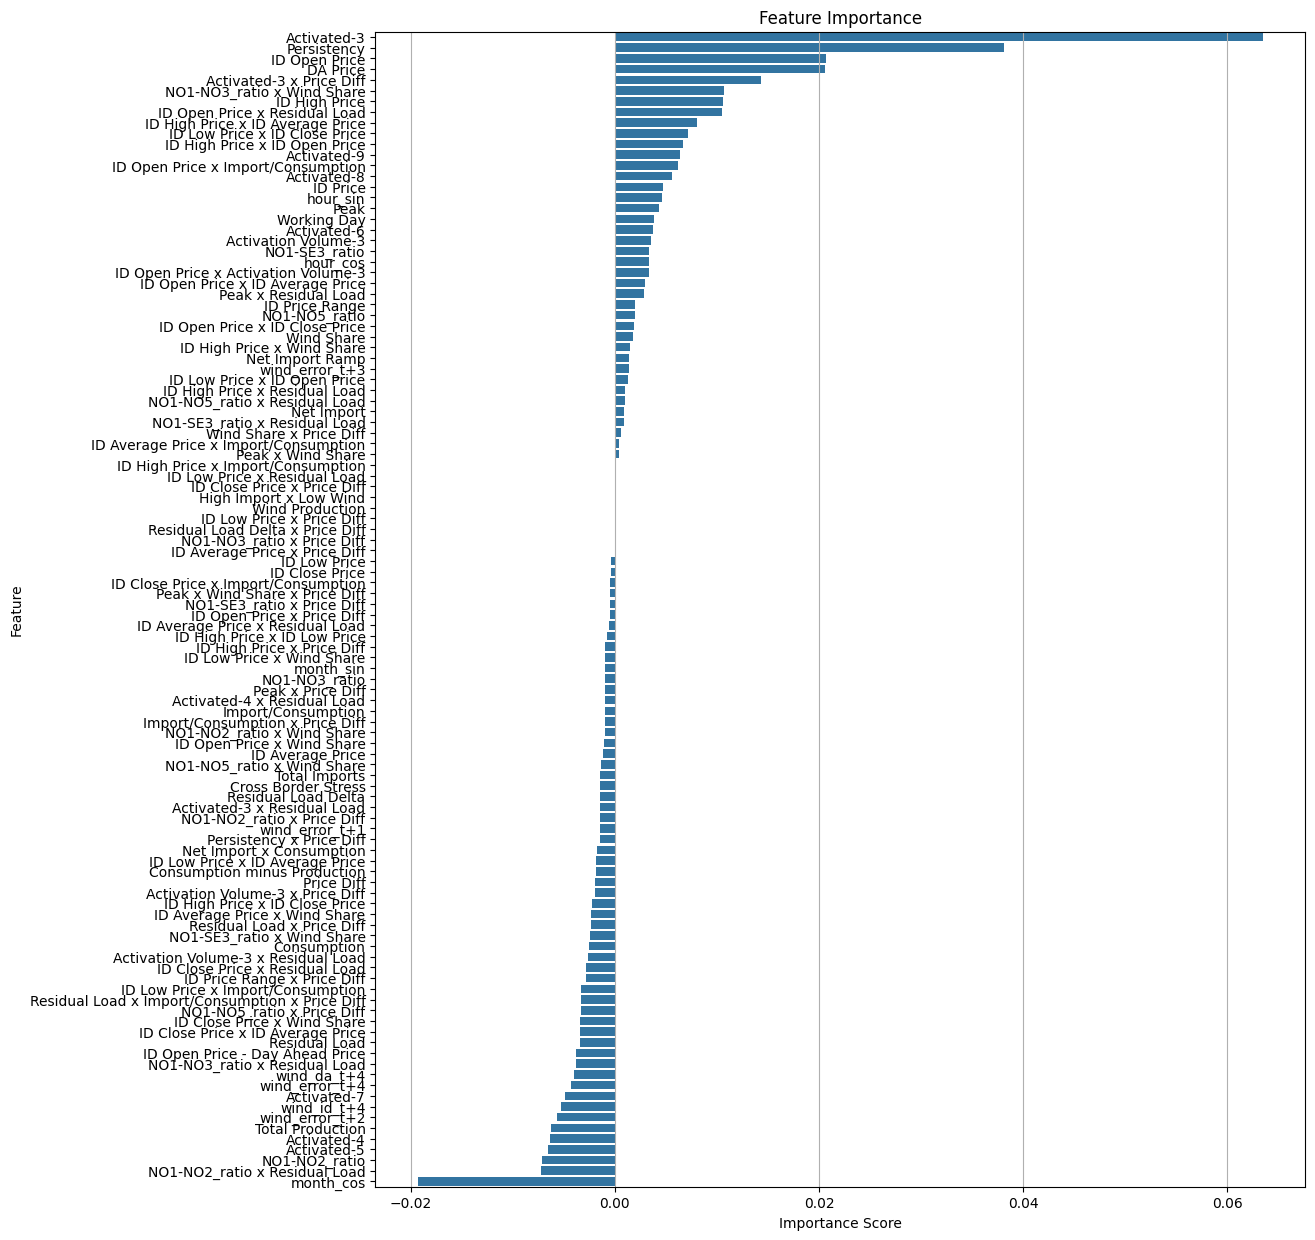

In [50]:
# Plot feature importance
# bigger figure
plt.figure(figsize=(12, 15))
sns.barplot(x=feature_importance['importance'], y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


In [53]:
# Compute permutation importance using a thresholded metric (quick version)
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import random
import copy
def thresholded_perm_importance(predictor, data, label='Activated+4', model='ExtraTrees_BAG_L1',
                                 threshold=0.5, n_repeats=10, metric=f1_score, random_state=42):
    np.random.seed(random_state)
    cols = [c for c in data.columns if c != label]
    base_probs = predictor.predict_proba(data, model=model)
    # find positive column robustly
    pos_col = None
    for cand in [True, 'True', 1, '1']:
        if cand in base_probs.columns:
            pos_col = cand; break
    if pos_col is None:
        pos_col = base_probs.columns[-1]
    base_preds = (base_probs[pos_col].values >= threshold).astype(int)
    y_true = data[label].astype(int).values
    base_metric = metric(y_true, base_preds)
    importances = []
    for col in cols:
        scores = []
        for _ in range(n_repeats):
            data_perm = data.copy()
            data_perm[col] = np.random.permutation(data_perm[col].values)
            probs_perm = predictor.predict_proba(data_perm, model=model)[pos_col].values
            preds_perm = (probs_perm >= threshold).astype(int)
            scores.append(metric(y_true, preds_perm))
        importances.append((col, base_metric - np.mean(scores)))
    imp_df = pd.DataFrame(importances, columns=['feature','importance']).sort_values('importance', ascending=False)
    return imp_df, base_metric

# Example usage:
imp_df, baseline_f1 = thresholded_perm_importance(predictor, test_data, label='Activated+4',
                                                  model='ExtraTrees_BAG_L1', threshold=get_best_threshold(y, probs),
                                                  n_repeats=5)
print("Baseline F1:", baseline_f1)
print(imp_df.head(30))

Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\models\ExtraTrees_BAG_L1\model.pkl
Loading: c:\PythonProjects\rl_reserve_markets\upreg_classify\AutogluonModels\Ok\

Baseline F1: 0.4438573315719947
                                 feature  importance
4                            Activated-3    0.032494
12                           Persistency    0.026196
5                            Activated-4    0.024765
7                            Activated-6    0.004723
8                            Activated-7    0.004488
14                              hour_cos    0.003810
64          ID High Price x ID Low Price    0.003382
3                          NO1-SE3_ratio    0.002544
6                            Activated-5    0.002345
80         NO1-NO5_ratio x Residual Load    0.002225
95           Activated-4 x Residual Load    0.002149
72     ID Close Price x ID Average Price    0.001986
38                        ID Price Range    0.001897
11                   Activation Volume-3    0.001758
10                           Activated-9    0.001707
39                        wind_error_t+3    0.001640
33                         ID High Price    0.001600
55            

In [89]:
# Try several top-K values and record metric on the same test set
#top_ks = [75, 70, 65, 60, 55, 50, 45, 40]   # adapt to your feature count
top_ks = [47, 50, 52, 55, 70, 75,80, 85]

results = []
pr_stats_list = []  # collect PR stats per k (from plot_pr_with_thresholds)

for k in top_ks:
    selected = imp_df['feature'].iloc[:k].tolist()
    # ensure label included
    train_small = train_data[selected + ['Activated+4']]
    test_small = test_data[selected + ['Activated+4']]

    from autogluon.tabular import TabularPredictor  
    small_pred = TabularPredictor(label='Activated+4', eval_metric='f1', path=f'AG_temp_top{k}', verbosity=1)
    small_pred.fit(train_small, time_limit=300, presets='best_quality',
                   hyperparameters={'RF': {}, 'XT': {}})

    probs = small_pred.predict_proba(test_small, model='ExtraTrees_BAG_L1')[True]
    y = test_small['Activated+4'].astype(int).values
    
    # Plot PR curve using the function defined above and store its stats
    pr_stats = plot_pr_with_thresholds(
        probs,
        y,
        approx_threshold=0.45,
        recall_target=0.5,
        plot=False  # create a figure per K
    )
    pr_stats['k'] = k
    pr_stats_list.append(pr_stats)

   

# results contains (k, f1). pr_stats_list contains detailed PR stats per k.

c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([np.inf, -np.inf], np.nan, inplace=False)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\tabular\learner\default_learner.py:351: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[self.label] = X[self.label].replace([np.inf, -np.inf], np.nan)
c:\PythonProjects\rl_reserve_markets\.venv1\Lib\site-packages\autogluon\core\utils\utils.py:701: FutureWarning: Do

In [90]:
# Summarize PR stats across different top-K models
pr_summary = pd.DataFrame(pr_stats_list)
pr_summary[['k', 'f1_at_recall', 'threshold_at_recall',
                  'best_threshold', 'best_f1', 'best_precision', 'best_recall']]

,k,f1_at_recall,threshold_at_recall,best_threshold,best_f1,best_precision,best_recall
0,47,0.417845,0.187222,0.260000,0.442086,0.472853,0.415078
1,50,0.424220,0.196667,0.263333,0.451311,0.490835,0.417678
2,52,0.413992,0.187603,0.263333,0.444753,0.476710,0.416811
3,55,0.415217,0.190833,0.256667,0.450600,0.482213,0.422877
4,70,0.413028,0.190833,0.236190,0.439637,0.439067,0.440208
5,75,0.421245,0.195556,0.236667,0.444729,0.438183,0.451473
6,80,0.433799,0.199167,0.230000,0.440017,0.430705,0.449740
7,85,0.412473,0.191111,0.236667,0.434370,0.432874,0.435875


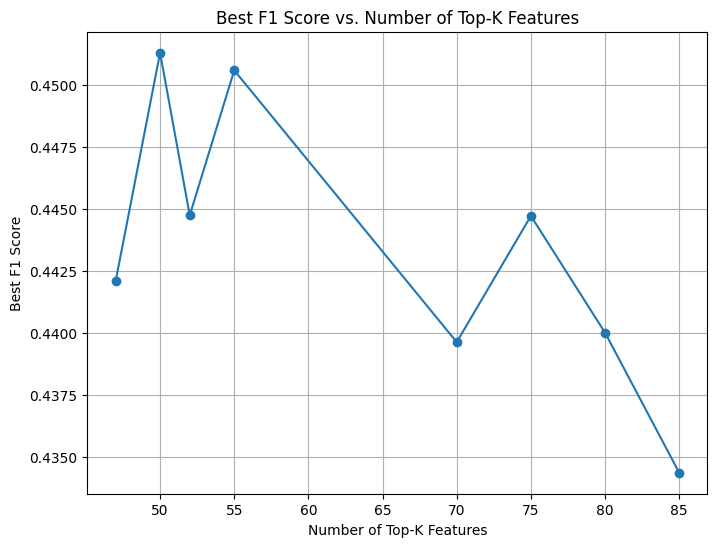

In [91]:
# Plot k with best F1 score
plt.figure(figsize=(8, 6))
plt.plot(pr_summary['k'], pr_summary['best_f1'], marker='o')
plt.title('Best F1 Score vs. Number of Top-K Features')
plt.xlabel('Number of Top-K Features')
plt.ylabel('Best F1 Score')
plt.grid()
plt.show()

In [97]:
# Make a safe copy and assign predictions as a column (avoid SettingWithCopyWarning)
test_df = test_df.copy()

# Compute prediction probabilities (use existing model if available)
try:
	proba_df = predictor.predict_proba(test_data, model=model)
except Exception:
	proba_df = predictor.predict_proba(test_data)

# Determine positive-class column robustly
if True in proba_df.columns:
	pos_col = True
elif 'True' in proba_df.columns:
	pos_col = 'True'
elif 1 in proba_df.columns:
	pos_col = 1
elif '1' in proba_df.columns:
	pos_col = '1'
else:
	pos_col = proba_df.columns[1] if proba_df.shape[1] >= 2 else proba_df.columns[-1]

probs = proba_df[pos_col].values

# Use best_threshold if present, otherwise default to 0.5
threshold = globals().get('best_threshold', 0.23)
print("Using threshold:", threshold)
predictions = probs >= threshold

test_df.loc[:, 'Predicted'] = predictions

# Filter for False -> True transitions (actual)
false_to_true = test_df[(test_df['Activated+4'] == True) & (test_df['Activated+4'].shift(1) == False)]

Using threshold: 0.23


In [98]:
# Num of True values in the Predicted column divided by the total number of rows in the DataFrame
num_true_predictions = false_to_true['Predicted'].sum()
total_false_to_true = len(false_to_true)
accuracy_false_to_true = (num_true_predictions / total_false_to_true) * 100 if total_false_to_true > 0 else 0
print(f"Accuracy of predicting False -> True transitions: {accuracy_false_to_true:.2f}% ({num_true_predictions}/{total_false_to_true})")

Accuracy of predicting False -> True transitions: 25.15% (86/342)


In [99]:
# get df to csv file
df.to_csv('classification_results.csv')

In [101]:
df['year'] = df.index.year
df.groupby('year')['Activated+4'].mean()


C:\Users\haako\AppData\Local\Temp\ipykernel_4740\959176502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


year
2024    0.156734
2025    0.115401
Name: Activated+4, dtype: object

Wind and price
Validation
Capacity and intraday

# NUCS, FFR, FCR, AFFR, SIDC2, SIDC3, HIGH UP DWON

# SIDC 15.06
# BIAS / IMBALANCE
# NUCS
# 

# different ways to fill data from SIDC